In [23]:
import sys
sys.path.append("D:\python\lib\site-packages")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd
from sklearn import preprocessing, datasets
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn.cluster import KMeans

plt.style.use('default')

In [ ]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')

In [ ]:
pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',',encoding="ISO-8859-1")

In [2]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [3]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])


(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [4]:
data_app_cN = pd.DataFrame(data_app_c)
data_app_cN = data_app_cN .dropna()

data_app_cN = data_app_cN.values
print(data_app_c.shape)
print(data_app_cN.shape)

print(data_app_c[2])
print(data_app_cN[2])

(10840, 13)
(7723, 13)
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [5]:
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][2] = float(data_app_c[i][2]) #Rating
    data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
    data_app_c[i][4] = float(data_app_c[i][4]) #Size
    data_app_c[i][5] = int(data_app_c[i][5]) #Installs

for i in range(len(data_app_cN[:])):
    data_app_cN[i][2] = float(data_app_cN[i][2]) #Rating
    data_app_cN[i][3] = float(data_app_cN[i][3]) #Reviews
    data_app_cN[i][4] = float(data_app_cN[i][4]) #Size
    data_app_cN[i][5] = int(data_app_cN[i][5]) #Installs
        
#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
data_app_c = np.delete(data_app_c, del_categories, 1)
data_app_cN = np.delete(data_app_cN, del_categories, 1)
head = np.delete(head, del_categories)

print(data_app_c.shape)
print(data_app_cN.shape)
print("----")


print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

# columns = [1'Category', 2'Rating', 3'Reviews', 4'Size', 5 Installs', 6'Type', 7'Content Rating'])


(10840, 7)
(7723, 7)
----
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


In [ ]:
# # print(data_app_c.isna().sum())

# # print(data_app_c.isna().sum())
# data_app_c.isnull().sum().sum()
# data_app_c = data_app_c.dropna()
# print(data_app_c.isnull().sum().sum())
# data_app_c = data_app_c.reset_index()
# data_app_c = data_app_c.values

In [6]:
le = preprocessing.LabelEncoder()

a = le.fit_transform(data_app_c.T[0].astype(str)) #Category
data_app_c.T[0] = a
a = le.fit_transform(data_app_c.T[5].astype(str)) #Type
data_app_c.T[5] = a
a = le.fit_transform(data_app_c.T[6].astype(str)) #Content Rating
data_app_c.T[6] = a

a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
data_app_cN.T[0] = a
a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
data_app_cN.T[5] = a
a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
data_app_cN.T[6] = a


enc = preprocessing.OneHotEncoder()
enc.fit(data_app_cN)
onehotlabels = enc.transform(data_app_cN).toarray()
onehotlabels.shape

print(data_app_cN.shape)
print(data_app_cN)
print(onehotlabels.shape)
print(onehotlabels)


# print(data_app_c[0])
# print(head)

(7723, 7)
[[0 4.1 159.0 ... 50000 0 1]
 [0 3.9 967.0 ... 500000 0 1]
 [0 4.7 87510.0 ... 5000000 0 1]
 ...
 [11 4.5 38.0 ... 5000 0 1]
 [11 5.0 4.0 ... 100 0 1]
 [18 4.5 398307.0 ... 10000000 0 1]]
(7723, 4822)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# Keep the data (rescaled) and the target labels
data = scale(np.array(data_app_cN))
print(data_app_cN[:, 0])

labels = head
print(data.shape)
print(labels.shape)

[0 0 0 ... 11 11 18]
(7723, 7)
(7,)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [8]:
data_I0 = []
data_I1 = []
data_I2 = []
data_I3 = []
data_I4 = []
data_I5 = []

for i in range(len(data_app_cN[:])):
    if float(data_app_cN[i][4]) == 100:
        data_I0.append(data_app_cN[i])
    if float(data_app_cN[i][4])== 5000:
        data_I1.append(data_app_cN[i])
    if float(data_app_cN[i][4]) == 50000:
        data_I2.append(data_app_cN[i])
    if float(data_app_cN[i][4]) == 500000:
        data_I3.append(data_app_cN[i])
    if float(data_app_cN[i][4]) == 5000000:
        data_I4.append(data_app_cN[i])
    if float(data_app_cN[i][4]) == 10000000:
        data_I5.append(data_app_cN[i])
        
print(data_I0)       

[array([7, 3.5, 2.0, 17.0, 100, 1, 3], dtype=object), array([7, 4.7, 6.0, 4.9, 100, 0, 3], dtype=object), array([7, 2.7, 3.0, 3.9, 100, 0, 3], dtype=object), array([7, 5.0, 2.0, 70.0, 100, 0, 3], dtype=object), array([7, 3.0, 2.0, 16.0, 100, 0, 3], dtype=object), array([7, 1.0, 1.0, 9.2, 100, 0, 3], dtype=object), array([7, 5.0, 6.0, 5.0, 100, 0, 3], dtype=object), array([7, 5.0, 5.0, 5.0, 100, 0, 3], dtype=object), array([7, 5.0, 3.0, 25.0, 100, 0, 3], dtype=object), array([7, 4.3, 6.0, 9.0, 100, 0, 3], dtype=object), array([7, 4.7, 6.0, 4.9, 100, 0, 3], dtype=object), array([7, 2.7, 3.0, 3.9, 100, 0, 3], dtype=object), array([10, 5.0, 16.0, 2.3, 100, 0, 1], dtype=object), array([10, 5.0, 1.0, 21.0, 100, 0, 1], dtype=object), array([11, 4.4, 38.0, 16.0, 100, 1, 1], dtype=object), array([11, 4.8, 4.0, 42.0, 100, 1, 1], dtype=object), array([20, 5.0, 3.0, 23.0, 100, 1, 1], dtype=object), array([20, 4.4, 8.0, 6.5, 100, 1, 1], dtype=object), array([20, 4.3, 3.0, 4.6, 100, 1, 1], dtype=obj

[-2.03631023 -0.50299945 -0.15770431 -0.38256626 -0.64514489 -0.28415572
 -0.46900087]
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


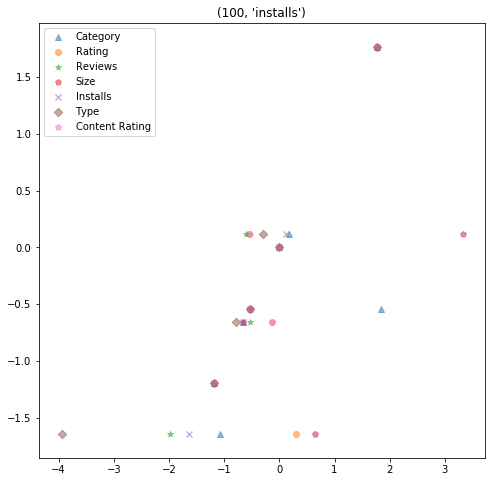

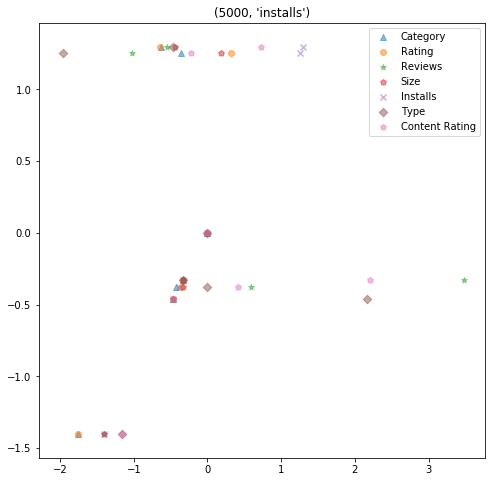

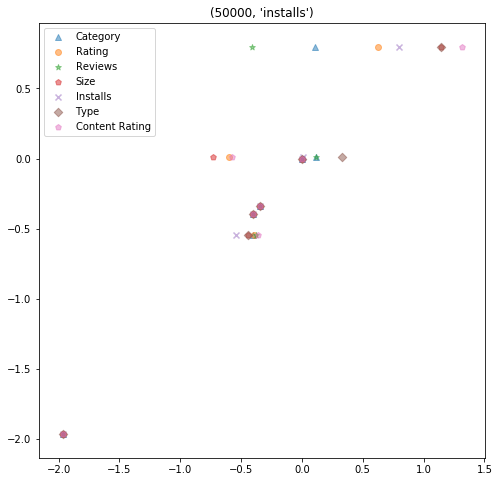

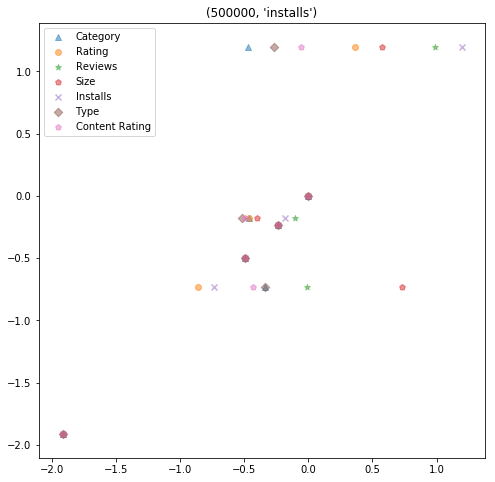

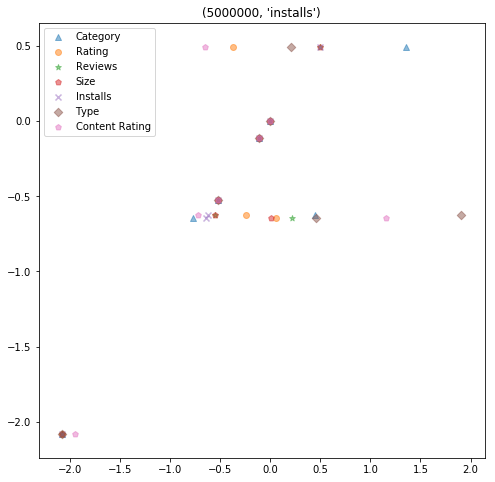

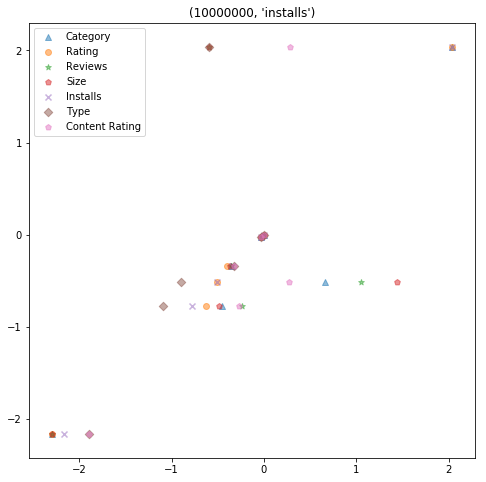

In [18]:
# Inspect the data
print(data[:][1])
#plt.subplots(7,7, figsize=(40,40))

install_win = [data_I0, data_I1, data_I2, data_I3, data_I4, data_I5]
markers = ['^', 'o', '*', 'p', "x", "D", "p"]

for h in range(len(install_win)):
    title = (install_win[h][0][4], "installs")
    install_win[h] = scale(install_win[h])
    plt.subplots(1,1 , figsize=(8, 8))
    for i in range(len(head)):
        plt.scatter(install_win[h][:][i], install_win[h][:][4], marker=markers[i], alpha = 0.5, label=head[i])
    plt.title(title)
    plt.legend()

print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

[1 1 1 ... 1 1 1]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


([], <a list of 0 Text yticklabel objects>)

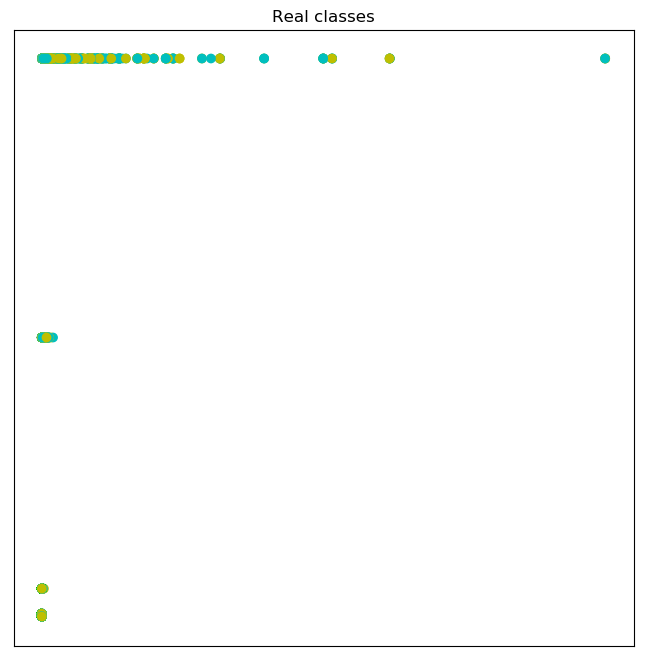

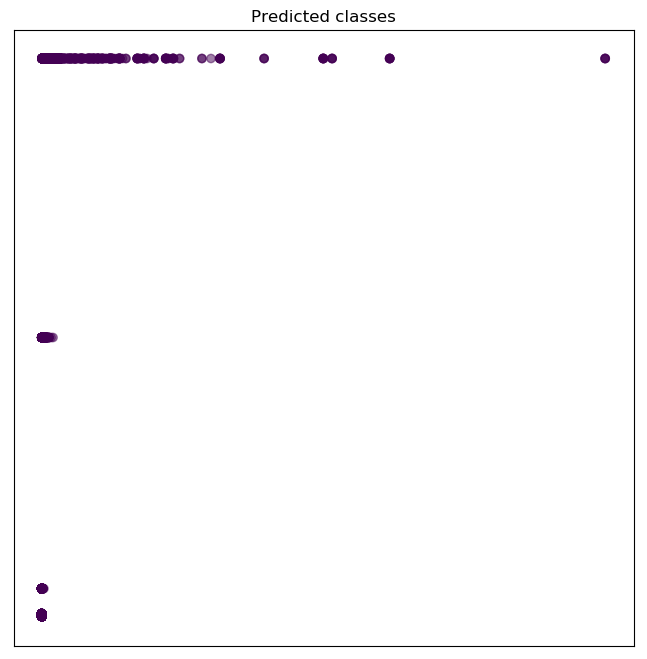

In [51]:
data = scale(data_app_cN)

# Initialize a model
model = KMeans(n_clusters=2)
# Fit the model to the data
model.fit(data)
colors = ['r', 'g', 'b','c', 'y', 'p', 'm']

all_prediction = model.predict(data_app_cN)
print(all_prediction)

# Let's plot it
plt.figure(figsize=(8,8))
plt.scatter(data[:,2], data[:,4], c=['c', 'y'])
plt.title('Real classes')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(8,8))
plt.scatter(data[:,2], data[:,4], c=all_prediction, alpha = 0.5)
plt.title("Predicted classes")
plt.xticks([])
plt.yticks([])

In [ ]:
pd.DataFrame(onehotlabels)

In [ ]:
#print(pd.DataFrame.describe(pd.DataFrame(data_app_c[:, 4])))
#print("--------")
n_samp = 7000

data_app_c = onehotlabels

random_idx = np.random.randint(0, len(data_app_c[:, 1]), n_samp)
rating_t = data_app_c[:, 1][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 2]), n_samp)
review_t = data_app_c[:, 2][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 4]), n_samp)
installs_t = data_app_c[:, 4][random_idx].astype(int)





plt.plot(review_t, alpha = 0.5, label = head[2])
plt.title(head[2])

plt.plot(installs_t, alpha = 0.5, label = head[4])
plt.title(head[4])

plt.plot(rating_t, alpha = 0.5, label = head[1])
plt.title(head[4])

plt.legend()

#not sure what this should plot but it gives an error
plt.figure(figsize=(10,10))

i=0
for i in enumerate(head):        
    plt.subplot(5,5, i+1)
    plt.hist(data_app_c[:,i])
    plt.title(head[i])
    plt.legend()
    plt.tight_layout()

In [ ]:
dataframe_app_c = pd.DataFrame(onehotlabels)
dataframe_app_c.shape

In [ ]:
# K-Means Clustering

X = dataframe_app_c


#REMOVED AOVE: App  object

#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Price              object
#Content Rating     object
#Genres             object
#Last Updated       object
#Current Ver        object
#Android Ver        object

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
#X.columns = onehotlabels.T[:] #['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']

# Eliminating null values
#for i in X.columns:
    #X[i] = X[i].fillna(int(X[i].mean()))
#for i in X.columns:
    #print(X[i].isnull().sum())
    

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the googleplaydata dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of apps')
plt.legend()
plt.show()